E-Learning Course 

In [1]:
import pandas as pd

In [3]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

In [4]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [7]:
fcc["JobRoleInterest"].unique()

array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

In [8]:
fcc['JobRoleInterest'].value_counts() * 100

Full-Stack Web Developer                                                                                                                                                                               82300
  Front-End Web Developer                                                                                                                                                                              45000
  Data Scientist                                                                                                                                                                                       15200
Back-End Web Developer                                                                                                                                                                                 14200
  Mobile Developer                                                                                                                                                                  

In [9]:
fcc['JobRoleInterest'].value_counts(normalize = True) * 100


Full-Stack Web Developer                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                                                                                  

In [10]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')


In [11]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

In [12]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer')

In [13]:
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

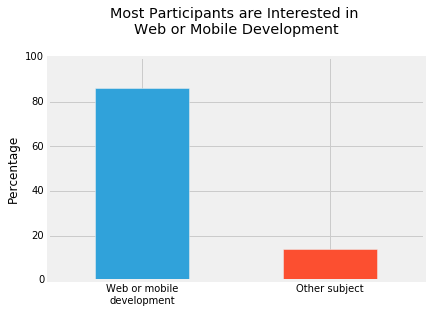

In [15]:
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],rotation = 0) 
plt.ylim([0,100])
plt.show()